In [22]:
import sqlite3
import numpy as np  
import matplotlib.pyplot as plt
import codecs

In [23]:
db = sqlite3.connect('twisto_tweets.db')
COUNT = data_hours = db.execute("SELECT COUNT(*) FROM tweets").fetchone()[0]

In [24]:
#data = db.execute("SELECT 'strftime('%Y-%m-%', time, 'unixepoch') as d, COUNT(date(time, 'unixepoch')) FROM tweets GROUP BY d ORDER BY time ASC;").fetchall()
data = db.execute("""SELECT strftime('%Y-%m', time, 'unixepoch') || '-' || ((strftime('%j', date(time, 'unixepoch', '-3 days', 'weekday 4')) - 1) / 7 + 1) as d, COUNT(date(time, 'unixepoch')) FROM tweets GROUP BY d ORDER BY time ASC;""").fetchall()
data = np.array(data)


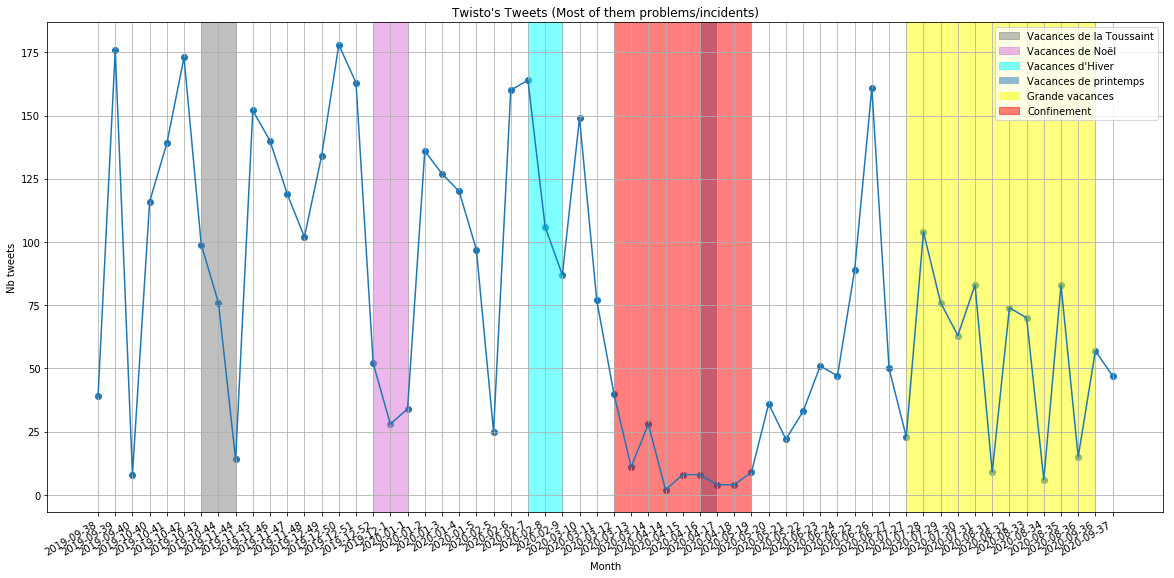

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
#2019-09-40
x, y = data[:, 0], data[:, 1].astype('float') 
ax.scatter(x,y)
ax.plot(x,y)
# ax.vlines('2020-03', 0, max(y), colors='red', linestyles='dashed', label='Confinement 17/03')
# ax.vlines('2020-05', 0, max(y), colors='green', linestyles='dashed', label='Déconfinement 11/05')

# 2019
ax.axvspan('2019-10-43', '2019-11-44', alpha=0.5, label="Vacances de la Toussaint", color='gray')
ax.axvspan('2019-12-52', '2020-01-1', alpha=0.5, label="Vacances de Noël", color='orchid')
# 2020
ax.axvspan('2020-02-7', '2020-02-9', alpha=0.5, label="Vacances d'Hiver", color='cyan')
ax.axvspan('2020-04-16', '2020-04-17', alpha=0.5, label="Vacances de printemps")
ax.axvspan('2020-07-27', '2020-09-36', alpha=0.5, label="Grande vacances", color='yellow')

ax.axvspan('2020-03-12', '2020-05-19', alpha=0.5, label="Confinement", color='red')

ax.set_title("Twisto's Tweets (Most of them problems/incidents)")
ax.set_xlabel('Month')
ax.set_ylabel('Nb tweets')
plt.grid()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.gcf().autofmt_xdate()
plt.legend()
plt.ion()
plt.show()

#Vacances de la Toussaint Du samedi 19 octobre au lundi 4 novembre
# Vacances de Noël Du samedi 21 décembre au lundi 6 janvier
# Vacances d'Hiver -  samedi 15 février 2020 / lundi 2 mars 2020
# Vacances de printemps	samedi 11 avril 2020 / lundi 27 avril 2020
#   Confinement    - mardi 17 mars
#   Déconfinement  - lundi 11 mai - Réouverture progressive du circuit Twisto,
# Grandes vacances - samedi 04 juillet 2020 / mardi 01 septembre 2020
# Regarder les températures(& évenement sur Caen    
# https://dev.meteostat.net/bulk
# 07027, https://bulk.meteostat.net/daily/07027.csv.gz

In [26]:
data_day = db.execute("SELECT strftime('%w', time, 'unixepoch') as d, COUNT(date(time, 'unixepoch')) FROM tweets GROUP BY d ORDER BY time ASC;").fetchall()
data_day = np.array(data_day).astype('object')
days = np.array(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
data_day[:,0] = days[data_day[:,0].astype('int')]

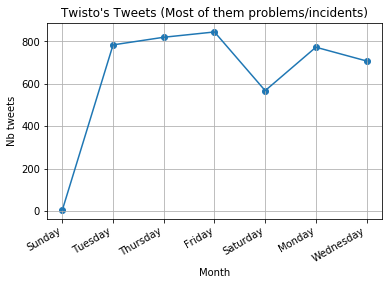

In [27]:
fig, ax = plt.subplots()
x, y = data_day[:, 0], data_day[:, 1].astype('float') 
ax.scatter(x,y)
ax.plot(x,y)

ax.set_title("Twisto's Tweets (Most of them problems/incidents)")
ax.set_xlabel('Month')
ax.set_ylabel('Nb tweets')
plt.grid()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.gcf().autofmt_xdate()
plt.show()
# L'info trafic du lundi au vendredi (7h/20h) et samedi (8h30/19h)

In [28]:
data = db.execute("SELECT time, text FROM tweets WHERE strftime('%w', time, 'unixepoch') LIKE '0'").fetchall() # Dimanche
data = np.array(data)

In [29]:
from datetime import datetime, timezone
for a in data[:, 0]:
    print(datetime.fromtimestamp(int(a), timezone.utc))

2019-11-24 15:27:39+00:00
2019-11-24 15:09:43+00:00
2019-11-24 14:37:28+00:00
2019-11-24 14:25:54+00:00
2019-11-24 13:48:03+00:00


In [30]:
data = db.execute("SELECT text FROM tweets").fetchall()
data = np.array(data)[:, 0]

In [31]:
test_line = data[0]

In [32]:
words = np.array(' '.join(data).split(' ')).astype("object")

In [33]:
counts = np.array(np.unique(words, return_counts=True))

In [34]:
a = counts[::, counts[1,].argsort()[::-1]]

In [35]:
with codecs.open("count.txt", 'w', 'utf8') as f:
    for i in a.T:
        f.write(f"{i[1]} : {i[0]}\n")

In [36]:
a.T

array([['de', 5258],
       ['à', 5125],
       ['#infotwisto', 3439],
       ...,
       ['D.', 1],
       ['https://t.co/eNy8rt43PL', 1],
       ['🤩📱💃]\nDu', 1]], dtype=object)

In [37]:
db.execute("SELECT COUNT(text), text FROM tweets WHERE text LIKE '%été%'").fetchall()

[(612,
  "#infotwisto L8 -&gt; Poincare (incident) Le départ prévu à 18h25 de Baclesse n'a pas été effectué. Merci de votre compréhension.")]

In [38]:
counts[::, counts[1,].argsort()[::-1]]

array([['de', 'à', '#infotwisto', ..., 'D.', 'https://t.co/eNy8rt43PL',
        '🤩📱💃]\nDu'],
       [5258, 5125, 3439, ..., 1, 1, 1]], dtype=object)

In [39]:
data_hours = db.execute("SELECT strftime('%H', time, 'unixepoch') as d, COUNT(date(time, 'unixepoch')) FROM tweets GROUP BY d ORDER BY d ASC;").fetchall()
data_hours = np.array(data_hours)#.astype('object')
#days = np.array(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
#data_hours[:,0] = days[data_day[:,0].astype('int')]
print(data_hours)

[['04' '20']
 ['05' '230']
 ['06' '357']
 ['07' '374']
 ['08' '263']
 ['09' '313']
 ['10' '306']
 ['11' '315']
 ['12' '333']
 ['13' '392']
 ['14' '378']
 ['15' '413']
 ['16' '397']
 ['17' '261']
 ['18' '131']
 ['19' '16']
 ['20' '1']
 ['21' '2']
 ['22' '1']]


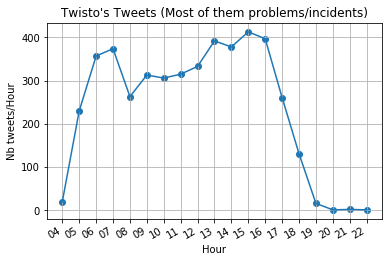

In [40]:
fig, ax = plt.subplots()
x = data_hours[:, 0]
y = data_hours[:, 1].astype('float')#*100 / COUNT
ax.scatter(x,y)
ax.plot(x,y)

ax.set_title("Twisto's Tweets (Most of them problems/incidents)")
ax.set_xlabel('Hour')
ax.set_ylabel('Nb tweets/Hour')
plt.grid()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.gcf().autofmt_xdate()
plt.show()
# L'info trafic du lundi au vendredi (7h/20h) et samedi (8h30/19h)

In [41]:
weather_data = db.execute("""SELECT date, tavg FROM weather""").fetchall()
weather_data = np.array(data)

weather_data_partial = weather_data[16900:16935:]


In [42]:
fig, ax = plt.subplots(figsize=(20, 10))

x = weather_data_partial[:, 0]
y = weather_data_partial[:, 1].astype('float')
ax.scatter(x,y)
ax.plot(x,y)

ax.set_title("Average temperature - Caen")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature °C')
plt.grid()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.gcf().autofmt_xdate()
plt.show()

IndexError: too many indices for array